# Convex optimization-based attack

Trying to formulate an inverse problem in order to recover the underlying image in two cases:
- knowledge of PSF
- bad mask values -> bad PSF

Use `scripts/convex_optimization_attack.py` to simulate multiple attacks and compute quantitative metrics.

This notebook is to visualize individual files.

## load original image, this cell can be used to determine best ROI (region of interest) depending on physical parameters

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from lenslessclass.datasets import CelebAPropagated

CELEBA_ROOT_DIR = "/scratch"


sensor = "rpi_hq"
mask2sensor = 4e-3
object_height = 0.27
scene2mask = 55e-2
sensor_size = tuple(np.array([24, 32]) * 16)
idx = 1


ds_aug = CelebAPropagated(
    output_dim=sensor_size,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    sensor=sensor,
    object_height=object_height,
    grayscale=True,
    root=CELEBA_ROOT_DIR
)

Shape : (195, 160)
Maximum value : 255
Minimum value : 0


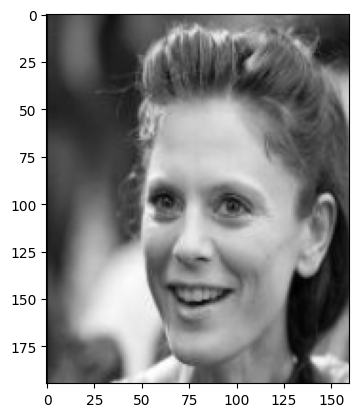

In [2]:
# TODO : ROI changes depending on physical parameters
roi = [[95, 290], [175, 335]]   # scene2mask = 55e-2, object_height = 0.27, mask2sensor = 4e-3


# load image
img, labels = ds_aug[idx]
img = np.transpose(img.cpu(), (1, 2, 0)).squeeze().numpy()
if roi is not None:
    img = img[roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]]

print(f"Shape : {img.shape}")
print(f"Maximum value : {img.max()}")
print(f"Minimum value : {img.min()}")

plt.imshow(img, cmap="gray");

# load recovered image

(195, 160)


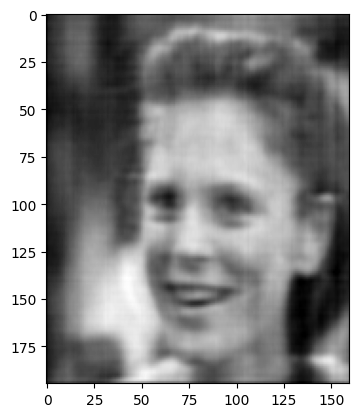

In [16]:
DATA_DIR = "../data"

# correct PSF
ds_path = "celeba_recovered_scene2mask0.55_height0.27_384x512"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_192x256"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_96x128"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_48x64"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_24x32"

# # # bad PSF
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_384x512_diff_slm"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_192x256_diff_slm"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_96x128_diff_slm"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_48x64_diff_slm"
# ds_path = "celeba_recovered_scene2mask0.55_height0.27_24x32_diff_slm"


img_recover = np.array(Image.open(os.path.join(DATA_DIR, ds_path, f"{idx}.png")))
if roi is not None:
    img_recover = img_recover[roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]]
print(img_recover.shape)
plt.imshow(img_recover, cmap="gray");

# # uncomment to save image
# im = Image.fromarray(img_recover)
# im.save(f"{os.path.basename(ds_path)}_{idx}.png")



# compare with original image

In [6]:
print("PSNR : ", peak_signal_noise_ratio(img, img_recover))
print("SSIM : ", structural_similarity(img, img_recover))

PSNR :  25.294793822035004
SSIM :  0.80598437833806
